# K-Means Clustering - Detailed Tutorial with Hands-on

#### Clustering falls under the Unserpervised Machine Leaning Family. 

More on the Machine Learning Classification:
<img src=https://raw.githubusercontent.com/nadarsubash/articles/master/ML_Classification.jpeg width=600 heigth=600) />

## K-Means is a Heuristic Algorithm which groups together relatively closer objects into K Clusters 
K-Means is one of the most widely used Clustering algorithm 

##### Steps involved in K-Means algorithm

### Step 1) Let's first take some sample data *(what better than iris data)*

We are taking very few samples (records) of each species for this Tutorial <br>
*Complete dataset is freely available [here](https://archive.ics.uci.edu/ml/datasets/Iris)*

|Data #	|sepal length in cm	|sepal width in cm	|class|
|-----|-----|-----|-----|
|1	|6.3	|3.3	|Iris-virginica|
|2	|5.8	|2.7	|Iris-virginica|
|3	|7.1	|3	|Iris-virginica|
|4	|5.1	|3.5	|Iris-setosa|
|5	|4.9	|3	|Iris-setosa|
|6	|4.7	|3.2	|Iris-setosa|
|7	|4.6	|3.1	|Iris-setosa|
|8	|7	|3.2	|Iris-versicolor|
|9	|6.4	|3.2	|Iris-versicolor|
|10	|6.9	|3.1	|Iris-versicolor|
|11	|5.5	|2.3	|Iris-versicolor|

for simplicity sake, we shall only consider two dimentional data i.e. only sepal length and width

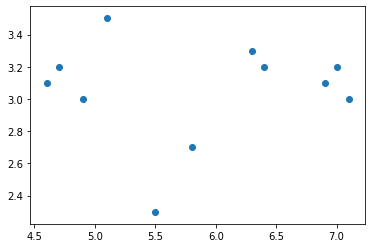

In [111]:
# Lets plot a scatter chart, which shall help us in guessing the no. of clusters we may need

import matplotlib.pyplot as plt
x = [6.3, 5.8, 7.1, 5.1, 4.9, 4.7, 4.6, 7, 6.4, 6.9, 5.5]
y = [3.3, 2.7, 3, 3.5, 3, 3.2, 3.1, 3.2, 3.2, 3.1, 2.3]
plt.scatter(x,y)
plt.show()

### Step 2) Decide no. of clusters *(randomly based on above plot)* 

Again for simplicity sake, we go with **k=3**, as our aim is to understand what happens in the background of the K-Means algorithm.

*N.B.* We can use Elbow method using Within-Cluster-Sum-of-Squares (WCSS) in Python to decide optimized number of *k*. This is explained in detail in the exercise **below**  *(KMeans clustering using package from SciKitLearn)*

### Step 3) Identify the Centroids *$C_{i}$*

Let's take Data # 1, 4 & 8 as the centroid for the first iteration <br>
$C_{1}$ = (6.3, 3.3) <br>
$C_{2}$ = (5.1, 3.5) <br>
$C_{3}$ = (7.0, 3.2) <br>

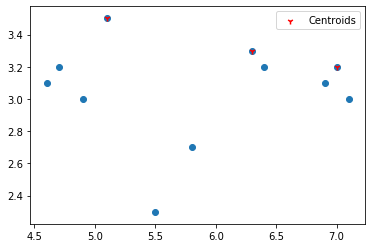

In [95]:
import matplotlib.pyplot as plt
x = [6.3, 5.8, 7.1, 5.1, 4.9, 4.7, 4.6, 7, 6.4, 6.9, 5.5]
y = [3.3, 2.7, 3, 3.5, 3, 3.2, 3.1, 3.2, 3.2, 3.1, 2.3]

cx = [6.3, 5.1, 7]
cy = [3.3, 3.5, 3.2]

plt.scatter(x,y)
plt.scatter(cx,cy,label='Centroids',color='red',marker='1')

plt.legend()
plt.show()

### Step 4) Measure the distance between the Centroids and each of the data points

This distance shall help us decide which point is closeset to which Centroid, which in turn shall help us decide to form clusters (groups)

Let's use **Manhattan Distance** for this calculation <br>
*You may as well check other distance calculation methods like Euclidean, Minkowski distance etc*

Manhattan Distance between data point **X**(x1, y1) and centroid **C**(x2, y2) is: <br>
Distance **dist(X, C)** = |x1 – x2| + |y1 – y2|

**ITERATION 1**

|Data #	|sepal length in cm	|sepal width in cm	|Dist. from C1	|Dist. from C2	|Dist. from C3	|Cluster tagged|
|---|-------|-------|-------|-------|------|---|
|1	|6.3	|3.3	|0.00	|1.00	|0.60	|C1|
|2	|5.8	|2.7	|1.10	|0.10	|1.70	|C2|
|3	|7.1	|3.0	|0.50	|1.50	|0.10	|C3|
|4	|5.1	|3.5	|1.00	|0.00	|1.60	|C2|
|5	|4.9	|3.0	|1.70	|0.70	|2.30	|C2|
|6	|4.7	|3.2	|1.70	|0.70	|2.30	|C2|
|7	|4.6	|3.1	|1.90	|0.90	|2.50	|C2|
|8	|7.0	|3.2	|0.60	|1.60	|0.00	|C3|
|9	|6.4	|3.2	|0.00	|1.00	|0.60	|C1|
|10	|6.9	|3.1	|0.40	|1.40	|0.20	|C3|
|11	|5.5	|2.3	|1.80	|0.80	|2.40	|C2|

### Step 5) Now calculate new centroid location based on the 'Cluster tagged'

Formula for calculating new centroids:
$$C_{x}=(\frac{1}{n})\sum_{i=1}^{n}x_{i}$$    $$C_{y}=(\frac{1}{n})\sum_{i=1}^{n}y_{i}$$

##### New Centroids are:
$C_{1}$ = (6.35, 3.25) <br>
$C_{2}$ = (5.1, 2.97) <br>
$C_{3}$ = (7.0, 3.1) <br>

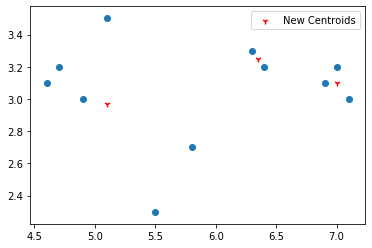

In [112]:
import matplotlib.pyplot as plt
x = [6.3, 5.8, 7.1, 5.1, 4.9, 4.7, 4.6, 7, 6.4, 6.9, 5.5]
y = [3.3, 2.7, 3, 3.5, 3, 3.2, 3.1, 3.2, 3.2, 3.1, 2.3]

cx = [6.35, 5.1, 7]
cy = [3.25, 2.97, 3.1]

plt.scatter(x,y)
plt.scatter(cx,cy,label='New Centroids',color='red',marker='1')

plt.legend()
plt.show()

### Step 6) Iterate Step 4 and Step 5 till there is no change to the Centroid

In this example, there is no change to the Centroid in the 2nd Iteration, hence we can assume this to be the most optimum Centroid

**ITERATION 2**

|Data #	|sepal length in cm	|sepal width in cm	|Dist. from C1	|Dist. from C2	|Dist. from C3	|Cluster tagged	|
|---|---|---|---|---|---|---|
|	1	|	6.3	|	3.3	|	0.0	|	1.5	|	0.5	|	C1	|
|	9	|	6.4	|	3.2	|	0.0	|	1.5	|	0.5	|	C1	|
|	2	|	5.8	|	2.7	|	1.1	|	0.4	|	1.6	|	C2	|
|	4	|	5.1	|	3.5	|	1.0	|	0.5	|	1.5	|	C2	|
|	5	|	4.9	|	3	|	1.7	|	0.2	|	2.2	|	C2	|
|	6	|	4.7	|	3.2	|	1.7	|	0.2	|	2.2	|	C2	|
|	7	|	4.6	|	3.1	|	1.9	|	0.4	|	2.4	|	C2	|
|	11	|	5.5	|	2.3	|	1.8	|	0.3	|	2.3	|	C2	|
|	3	|	7.1	|	3	|	0.5	|	2.0	|	0.0	|	C3	|
|	8	|	7	|	3.2	|	0.6	|	2.1	|	0.1	|	C3	|
|	10	|	6.9	|	3.1	|	0.4	|	1.9	|	0.1	|	C3	|

##### Let's see pictorial representation of the above formed clusters

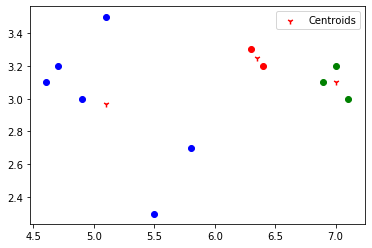

In [97]:
x1 = [6.3, 6.4]
y1 = [3.3, 3.2]
x2 = [5.8, 5.1, 4.9, 4.7, 4.6, 5.5]
y2 = [2.7, 3.5, 3, 3.2, 3.1, 2.3]
x3 = [7.1, 7, 6.9]
y3 = [3, 3.2, 3.1]
plt.scatter(x1,y1,color='r')
plt.scatter(x2,y2,color='b')
plt.scatter(x3,y3,color='g')
plt.scatter(cx,cy,label='Centroids',color='red',marker='1')
plt.legend()
plt.show()

##### Let's compare above plot with the Pictorial representation of the Original Distribution

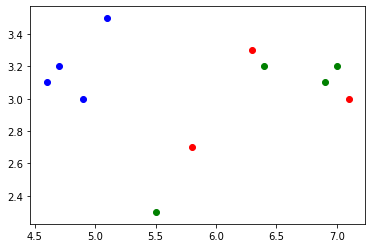

In [98]:
x1 = [6.3, 5.8, 7.1]
y1 = [3.3, 2.7, 3]
x2 = [5.1, 4.9, 4.7, 4.6]
y2 = [3.5, 3, 3.2, 3.1]
x3 = [7, 6.4, 6.9, 5.5]
y3 = [3.2, 3.2, 3.1, 2.3]
plt.scatter(x1,y1,color='r')
plt.scatter(x2,y2,color='b')
plt.scatter(x3,y3,color='g')
plt.show()

Hmm, our KMeans exercise seems to have fit the objects relatively accurate :)

This concludes the Tutorial for K-Means clustering

-----

#### Let's take a look at the newly created clusters vis-a-vis Actual Class as per the original data

|	Cluster tagged	|	Actual Class	|
|---|---|
|	C1	|	Iris-virginica	|
|	C1	|	Iris-versicolor	|
|	C2	|	Iris-virginica	|
|	C2	|	Iris-setosa	|
|	C2	|	Iris-setosa	|
|	C2	|	Iris-setosa	|
|	C2	|	Iris-setosa	|
|	C2	|	Iris-versicolor	|
|	C3	|	Iris-virginica	|
|	C3	|	Iris-versicolor	|
|	C3	|	Iris-versicolor	|

As you can see, there are some discrepencies. The two main reason for this discrepency is:<br>
**1)Inadequate Features:** We have considered only Sepal Length and Width and have not taken into consideration Petal Length & Width <br>
**2)Low Sample:** We have considered very few Data Points <br>

Above pointers are a good learing lessons and stresses on the point  how critical is to identify right number of Features and Samples

----

# Python Exercise:

## Let's use KMeans package from Scikit learn to perform this exercise on entire Iris dataset

In [99]:
#to read and format the Iris file
import pandas as pd 

#package to perform Kmeans algorithm
from sklearn.cluster import KMeans 

#For numerical functions
import numpy as np

#for graphs
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [100]:
#Read the Iris dataset which is available online
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")

#add headers to the file
attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
data.columns = attributes
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [101]:
# converting class names (string) to numbers which will aid us in plotting
data['class-num'] = data['class'].map( {'Iris-setosa': 0,'Iris-versicolor': 1,'Iris-virginica': 2} )

In [102]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class,class-num
0,4.9,3.0,1.4,0.2,Iris-setosa,0
1,4.7,3.2,1.3,0.2,Iris-setosa,0
2,4.6,3.1,1.5,0.2,Iris-setosa,0
3,5.0,3.6,1.4,0.2,Iris-setosa,0
4,5.4,3.9,1.7,0.4,Iris-setosa,0


In [103]:
#Define the features to be used for the algo i.e. remove column 'class' which is not required for the algo
X = data.drop(columns=["class","class-num"])

#Let's see the first five records in the file
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4


In [104]:
#Let's see the data characteristic
data.describe()

,sepal_length,sepal_width,petal_length,petal_width,class-num
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369,1.006711
std,0.828594,0.433499,1.759651,0.761292,0.817847
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Next Step is to identify optimum number of clusters (k)
Here we use **Elbow Method** *(clear elbow formed at the optimum cluster)* 

We plot the graph of Within-Cluster-Sum-of-Squares **(WCSS)** against the Total Number of clusters to view formation of elbow to arrive at the optimum number of cluster **k** 

**Idea is** - as the number of Clusters increases, sum of distance between the objects and it's respective clusters reduces *(objects get closer to their respective Cluster)*. But hey, we don't want to overfit either...correct. Hence the quest for optimum **k**

WCSS is computed as:<br>
$$WCSS=\sum_{i=1}^k(\sum_{j=1}^n (X_{j}-C_{i})^2)$$  <br>
*where:* <br>
*$C_{k}$ is centroid for observation $X_{i}$* <br>
*k is number of centroids* <br>
*n is number of objects within respective centroid* <br>

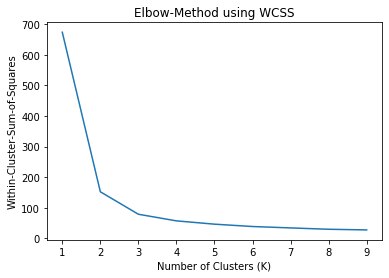

In [105]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('Elbow-Method using WCSS')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster-Sum-of-Squares')
plt.show()

We can see from above plot that prominent elbows are formed between at 2, 3 and 4<br>
Noticeably, WCSS reduces marginally below 3 and hence we select 3 as optimum **k**

In [106]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [107]:
inertia = kmeans.predict(X)

In [108]:
X["Clusters"] = inertia
X.head()

,sepal_length,sepal_width,petal_length,petal_width,Clusters
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0


### Let's plot the data based on cluster created using KMeans algo

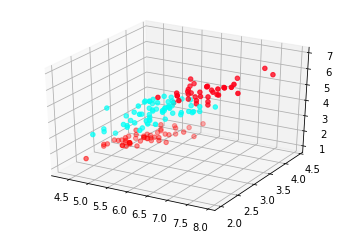

In [109]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(X['sepal_length'],X['sepal_width'],X['petal_length'],c=X['Clusters'],cmap='hsv')
plt.show()

### Let's compare the above plot with Original data (class)

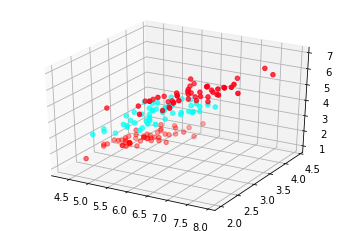

In [110]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(data['sepal_length'],data['sepal_width'],data['petal_length'],c=data['class-num'],cmap='hsv')
plt.show()

### KMeans Cluster has been able to largely group the points...well almost. This is a good begining!
#### ....and the end of this Tutorial with Hands-on Exercise!